In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential
from keras import optimizers
from keras.applications import VGG16
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
width = 150
height = 150
channel = 3

In [3]:
base_dir = '/Users/joannakang/Desktop/study/cat-and-dog'

In [4]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [5]:
class_name = os.listdir(train_dir)

In [6]:
class_name

['dogs', 'cats', '.DS_Store']

In [7]:
class_name.remove('.DS_Store')

In [8]:
class_name

['dogs', 'cats']

In [10]:
train_image = []
train_label = []

In [11]:
test_image = []
test_label = []

In [12]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[0. 1.]
 [1. 0.]]


/Users/joannakang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
# Color
for i in range(len(class_name)):
    path = os.path.join(train_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 3))
        train_image.append(img)
        train_label.append(onehot_encoded[i])

In [15]:
for i in range(len(class_name)):
    path = os.path.join(test_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 3))
        test_image.append(img)
        test_label.append(onehot_encoded[i])

In [16]:
print(len((train_image)))
print(len(train_label))
print(len(test_image))
print(len(test_label))

8005
8005
2023
2023


In [17]:
train_image = np.array(train_image)
train_label = np.array(train_label)
print(train_image.shape)

(8005, 150, 150, 3)


In [18]:
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.33, random_state=42)

In [19]:
print(train_image.shape)
print(val_image.shape)

(5363, 150, 150, 3)
(2642, 150, 150, 3)


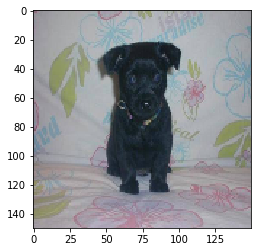

In [20]:
plt.imshow(train_image[0])

In [21]:
# personal model
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", activation = "relu", input_shape = (width, height, train_image.shape[3])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(train_label.shape[1], activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 64)       

In [23]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
loss_type = 'mean_squared_error', 'binary_crossentropy', 'categorical_crossentropy'

In [25]:
history = model.fit(x = train_image, y = train_label, validation_data = (val_image, val_label), batch_size = 32, epochs = 10)

Train on 5363 samples, validate on 2642 samples
Epoch 1/10
5363/5363 [==============================] - 79s 15ms/step - loss: 1.8557 - accuracy: 0.5331 - val_loss: 0.6917 - val_accuracy: 0.5076
Epoch 2/10
5363/5363 [==============================] - 79s 15ms/step - loss: 0.6669 - accuracy: 0.5761 - val_loss: 0.6369 - val_accuracy: 0.6067
Epoch 3/10
5363/5363 [==============================] - 80s 15ms/step - loss: 0.6394 - accuracy: 0.6197 - val_loss: 0.6678 - val_accuracy: 0.5783
Epoch 4/10
5363/5363 [==============================] - 80s 15ms/step - loss: 0.6267 - accuracy: 0.6410 - val_loss: 0.6137 - val_accuracy: 0.6584
Epoch 5/10
5363/5363 [==============================] - 82s 15ms/step - loss: 0.6016 - accuracy: 0.6731 - val_loss: 0.5862 - val_accuracy: 0.6953
Epoch 6/10
5363/5363 [==============================] - 79s 15ms/step - loss: 0.5756 - accuracy: 0.6925 - val_loss: 0.5715 - val_accuracy: 0.7125
Epoch 7/10
5363/5363 [==============================] - 80s 15ms/step - loss

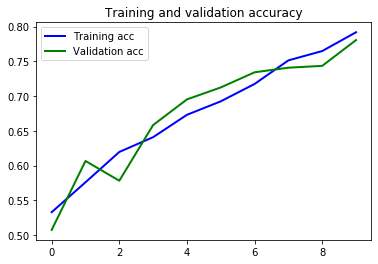

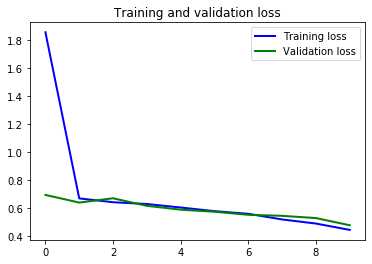

In [28]:
plt.rcParams['lines.linewidth'] = 2

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()